# 과제
타이타닉 데이터셋 이용 → 뉴럴네트워크 이용해서 accuracy 점수 내고 차트 그려오기

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston


In [65]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf

In [66]:
# tianic dataset after engineering
ttnic = pd.read_csv('./dataset/titanic.csv')

In [67]:
ttnic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
0,0,3,22,1,0,7.2500,0,1,1
1,1,1,38,1,0,71.2833,3,2,0
2,1,3,26,0,0,7.9250,0,1,0
3,1,1,35,1,0,53.1000,3,1,0
4,0,3,35,0,0,8.0500,0,1,1


In [68]:
X=ttnic.drop('Survived', axis=1)
y=ttnic['Survived']

In [69]:
print(X.shape, y.shape)

(891, 8) (891,)


In [70]:
model1=Sequential() # 전체를 감싸는 모델

# 모델 내에 레이어, Dense를 더해준다.relu
model1.add(Dense(units=16, activation='relu', input_dim=8)) # input layer   # input_dim은 input에만 쓴다.
model1.add(Dense(units=32, activation='relu'))                # hidden layer1
model1.add(Dense(units=64, activation='relu'))                # hidden layer1
model1.add(Dense(units=64, activation='relu'))                # hidden layer1
model1.add(Dense(units=64, activation='relu'))                # hidden layer1
model1.add(Dense(units=32, activation='relu'))                # hidden layer1
model1.add(Dense(units=32, activation='relu'))                # hidden layer1
model1.add(Dense(units=16, activation='relu'))                # hidden layer1
model1.add(Dense(units=8,  activation='relu'))                # hidden layer2
model1.add(Dense(units=1,  activation='sigmoid'))                # hidden layer3


In [71]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                144       
                                                                 
 dense_41 (Dense)            (None, 32)                544       
                                                                 
 dense_42 (Dense)            (None, 64)                2112      
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 32)               

In [72]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [73]:
res1=model1.fit(X,y,
            epochs=300,
            validation_split=0.2
          )

Epoch 1/300
23/23 [==============================] - 2s 18ms/step - loss: 0.6370 - accuracy: 0.6742 - val_loss: 0.5574 - val_accuracy: 0.6816
Epoch 2/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.6559 - val_loss: 0.5723 - val_accuracy: 0.7095
Epoch 3/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6163 - accuracy: 0.6798 - val_loss: 0.5336 - val_accuracy: 0.7318
Epoch 4/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.6882 - val_loss: 0.5824 - val_accuracy: 0.6648
Epoch 5/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6162 - accuracy: 0.6559 - val_loss: 0.5313 - val_accuracy: 0.7430
Epoch 6/300
23/23 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6840 - val_loss: 0.5332 - val_accuracy: 0.7263
Epoch 7/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.6938 - val_loss: 0.5214 - val_accuracy: 0.7765
Epoch 8/300


In [74]:
model1.evaluate(X,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8866


[0.31787753105163574, 0.8866442441940308]

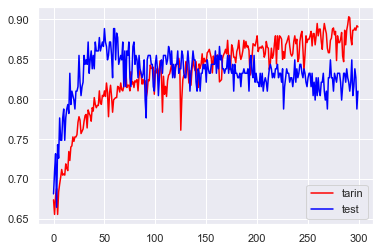

In [78]:
plt.plot(np.arange(len(res1.history['accuracy'])), res1.history['accuracy'], c='red', label='tarin')
plt.plot(np.arange(len(res1.history['accuracy'])), res1.history['val_accuracy'], c='blue', label='test')
plt.legend()
plt.show()

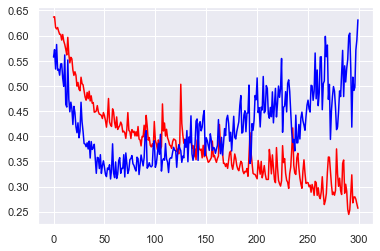

In [76]:
plt.plot(np.arange(len(res1.history['loss'])), res1.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res1.history['val_loss'])), res1.history['val_loss'], c='blue', label='val_loss')
plt.show()